# Import libraries

In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix 
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

# Reading dataset and handling missing 

correlation matrix:


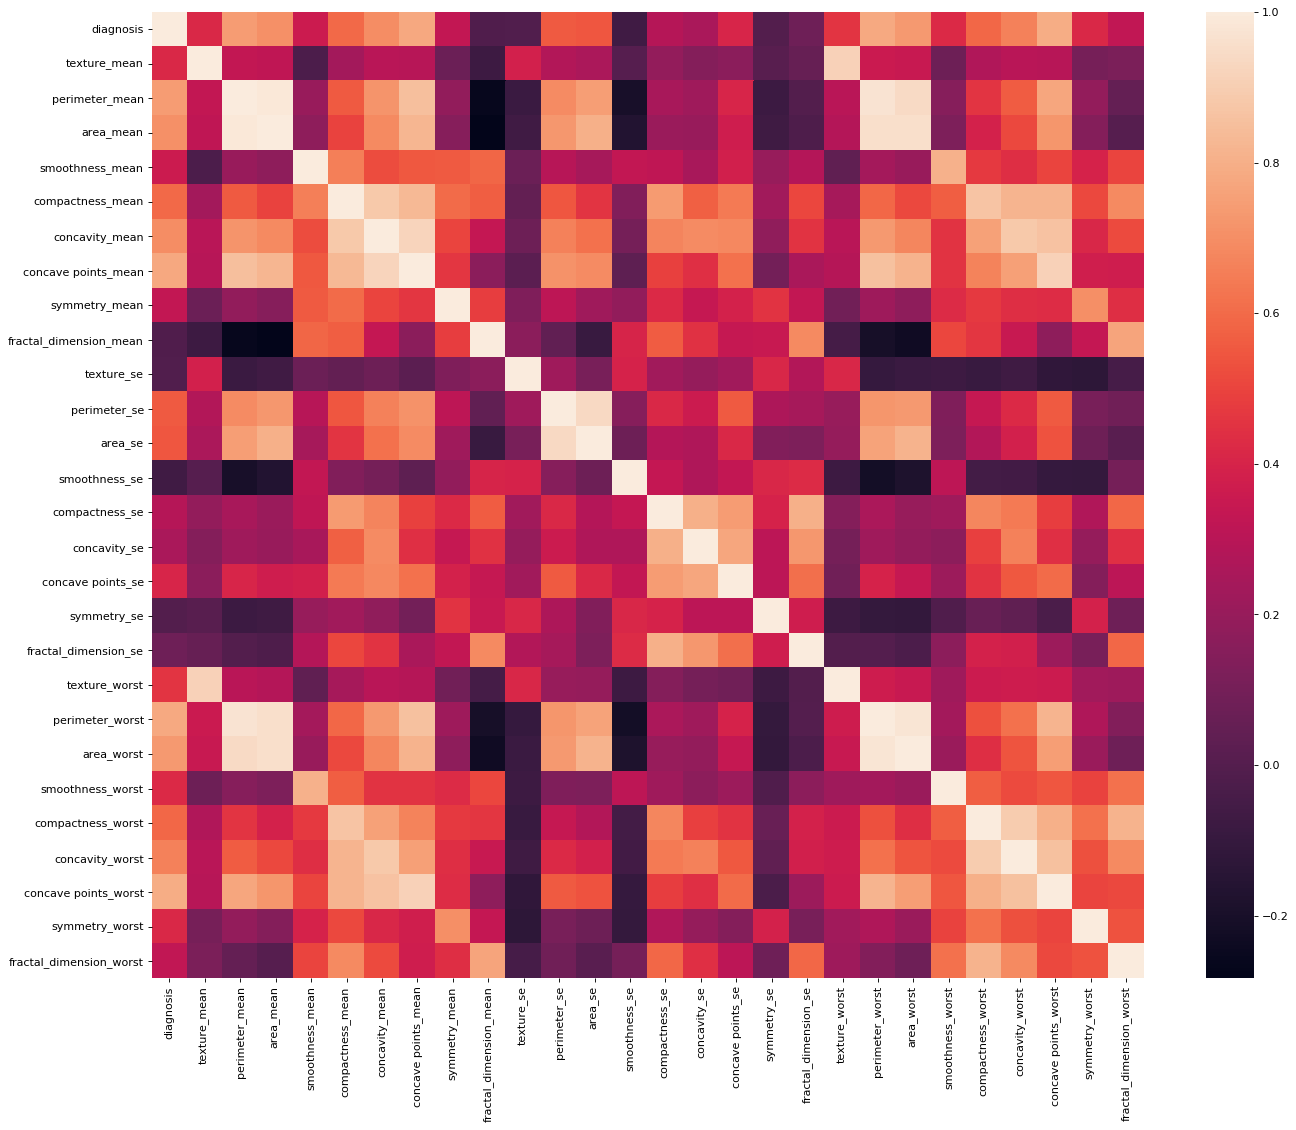

In [85]:
# read dataset 
df_1=pd.read_csv("data_refined.csv")
# print(df.head())
# qualitive analysis (visualize correlation)
print("correlation matrix:")
plt.figure(figsize=(20, 16), dpi=80)
sns.heatmap(df_1.corr())

In [86]:
# quantative analysis (correlation matrix values)
df_1.corr().loc["diagnosis",:]

diagnosis                  1.000000
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave points_worst       0.793566
symmetry_worst             0.416294
fractal_dimension_worst    0

## comment 
From the output, If we use the features that is correlation with the output target (diagnosis) above 0.6, the most correlation features to the target are as follows: 
- perimeter_mean
- area_mean
- concavity_mean
- concave points_mean
- perimeter_worst
- area_worst
- concavity_worst
- concave points_worst 

In [87]:
## drop all features except the most correlated features
df=df_1.drop(df.columns.difference(['diagnosis','perimeter_mean','area_mean','concavity_mean',\
                               'concave points_mean','perimeter_worst','area_worst','concavity_worst',\
                               'concave points_worst']), 1)
print("df columns are:\n", df.columns)

df columns are:
 Index(['diagnosis', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


# Split Dataset

In [88]:
X, Y= df.iloc[:,1:], df["diagnosis"]
x, x_test, y, y_test = train_test_split(X, Y,test_size=0.1,train_size=0.9)
x_train, x_validate, y_train, y_validate = train_test_split(x,y,test_size = 1/9.0,train_size =8/9.0)
print("size of training=", x_train.shape[0])
print("size of validate=", x_validate.shape[0])
print("size of test=", x_test.shape[0])

size of training= 455
size of validate= 57
size of test= 57


# Training classifiers

### Knn classifier 

score= 0.9649122807017544
score= 0.9473684210526315
score= 0.9649122807017544
score= 0.9649122807017544
score= 0.9649122807017544
score= 0.9649122807017544
score= 0.9649122807017544
score= 0.9473684210526315
score= 0.9473684210526315
score= 0.9473684210526315
score= 0.9473684210526315
score= 0.9298245614035088
score= 0.9298245614035088
score= 0.9298245614035088
score= 0.9122807017543859
score= 0.9298245614035088
score= 0.9298245614035088
score= 0.9298245614035088
score= 0.9298245614035088
score= 0.9298245614035088
max_score= 0.9649122807017544
best_k= 1


Text(0,0.5,'score')

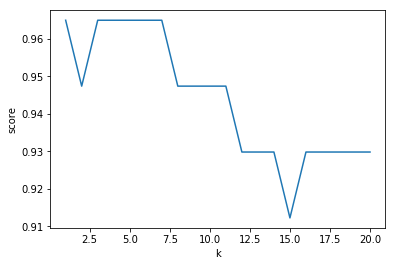

In [89]:
## train and validate classifier to get the best k value 
score_ls=[]
max_score=0 
best_k=0
for K in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=K)
    model.fit(x_train, y_train)
    # y_validate = model.predict(x_validate)
    # print("y_pred=",y_validate)
    score=model.score(x_validate,y_validate)
    print("score=",score)
    if(score>max_score):
        max_score=score
        best_k=K
    score_ls.append(score)
print("max_score=",max_score)
print("best_k=",best_k)
plt.plot(range(1,21),score_ls)
plt.xlabel("k")
plt.ylabel("score") 

In [90]:
# train classifier with best k value
knn_model = KNeighborsClassifier(n_neighbors=K)
knn_model.fit(x_train, y_train)
score=model.score(x_test,y_test)
print("testing accuracy=",score )
y_pred=knn_model.predict(x_test)
print("confusion matrix for knn classifier=\n",confusion_matrix(y_test, y_pred))

testing accuracy= 0.9473684210526315
confusion matrix for knn classifier=
 [[39  1]
 [ 2 15]]


# Logistic Regression Classifier

In [91]:
# train classifier 
logistic_model=LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_score=logistic_model.score(x_test,y_test)
print("testing accuracy=",logistic_score)
y_pred=logistic_model.predict(x_test)
print("confusion matrix for logistic classifier=\n",confusion_matrix(y_test, y_pred))

testing accuracy= 0.9298245614035088
confusion matrix for logistic classifier=
 [[39  1]
 [ 3 14]]


# challenge 

we can reduce features again by removing dependent features

In [92]:
correlation_mat=df.corr().loc[df.columns.difference(["diagnosis"]),df.columns.difference(["diagnosis"])] 
correlation_mat[correlation_mat>0.7]

,area_mean,area_worst,concave points_mean,concave points_worst,concavity_mean,concavity_worst,perimeter_mean,perimeter_worst
area_mean,1.000000,0.959213,0.823269,0.722017,NaN,NaN,0.986507,0.959120
area_worst,0.959213,1.000000,0.809630,0.747419,NaN,NaN,0.941550,0.977578
concave points_mean,0.823269,0.809630,1.000000,0.910155,0.921391,0.752399,0.850977,0.855923
concave points_worst,0.722017,0.747419,0.910155,1.000000,0.861323,0.855434,0.771241,0.816322
concavity_mean,NaN,NaN,0.921391,0.861323,1.000000,0.884103,0.716136,0.729565
concavity_worst,NaN,NaN,0.752399,0.855434,0.884103,1.000000,NaN,NaN
perimeter_mean,0.986507,0.941550,0.850977,0.771241,0.716136,NaN,1.000000,0.970387
perimeter_worst,0.959120,0.977578,0.855923,0.816322,0.729565,NaN,0.970387,1.000000


### comment 
From the table above, we can see that the dependent features are: 
- perimeter_mean
- perimeter_worst
- Area_worst
- concavity_worst
- concave points_mean
- concave points_worst

In [93]:
df.drop(["perimeter_mean","perimeter_worst", "area_worst", "concavity_worst", "concave points_mean","concave points_worst"], axis=1,inplace=True)
print("new columns=",df.columns)

new columns= Index(['diagnosis', 'area_mean', 'concavity_mean'], dtype='object')


In [100]:
## train and test split again
X, Y= df.iloc[:,1:], df["diagnosis"]
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X, Y,test_size=0.2,train_size=0.8)
print("size of training=", x_train_2.shape[0])
print("size of test=", x_test_2.shape[0])

size of training= 455
size of test= 114


In [101]:
## train by logistic classifier
logistic_model=LogisticRegression()
logistic_model.fit(x_train_2, y_train_2)
logistic_score=logistic_model.score(x_test_2,y_test_2)
print("testing accuracy=",logistic_score)
y_pred=logistic_model.predict(x_test_2)
print("confusion matrix for logistic classifier=\n",confusion_matrix(y_test, y_pred))

testing accuracy= 0.9210526315789473
confusion matrix for logistic classifier=
 [[54 17]
 [33 10]]
